# Data Processing for MobileNet

## Import libraries

In [ ]:
conda install scikit-image

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.image import imread
from skimage import io, transform

## Upload Data Set

In [10]:
df_mat = pd.read_hdf('matminer_gau_cmp.h5','matminerstd')
df_mp = pd.read_hdf('mp_gau_cmp.h5','mp')

In [11]:
### Join the data sets
df = pd.concat([df_mat, df_mp], ignore_index=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87989 entries, 0 to 87988
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mpid            87989 non-null  object
 1   crystal_system  87989 non-null  object
 2   Ygau            87989 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB


In [13]:
df.loc[73]

mpid                                                      mp-601148
crystal_system                                         Orthorhombic
Ygau              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: 73, dtype: object

In [14]:
df[df['mpid'] == 'mp-604118']

,mpid,crystal_system,Ygau
83727,mp-604118,Orthorhombic,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Create the Directories

In [5]:
#data set directory
dataset_path = Path.cwd() /'img_datasetV2'
#dataset_path.mkdir(exist_ok= True)

In [6]:
#Create the crystal systems directories
for sys in df.crystal_system.unique():
    sys_path = dataset_path / sys
    #sys_path.mkdir(exist_ok= True)

## Generate the Diffraction Patterns

In [34]:
df.head()

,mpid,crystal_system,Ygau
0,mp-85,Tetragonal,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,mp-110,Cubic,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,mp-20,Cubic,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,mp-8640,Cubic,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,mp-674158,Cubic,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [24]:
df[df['mpid'] == 'mp10000']

,mpid,crystal_system,Ygau


In [7]:
%matplotlib inline
def generate_DIF_img(material):
    name =  str(material.mpid) + '.jpg'
    path =  dataset_path / material.crystal_system / name
    img = material.Ygau.reshape((1, -1)) 
    
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(img, cmap = 'hot', aspect='auto')
    ax.axis('off')
    plt.savefig(fname = path, bbox_inches='tight') #Save the DIF pattern
    plt.close(fig) 

In [8]:
for index, material in df.iterrows():
    if index <= 79970:
        continue
        
    generate_DIF_img(material)

    if index == df.shape[0] // 3:
        print('third compleated')

    if index == df.shape[0] // 2:
        print('half compleated')

    if index == 2 * df.shape[0] // 3:
        print('2/3 compleated')

    if index == df.shape[0] - 10000:
        print('10000 left')
    if index == df.shape[0] - 5000:
        print('5000 left')

5000 left


In [12]:
%matplotlib inline
def generate_DIF_img(material):
    name =  str(material.mpid) + '.jpg'
    path = dataset_path / material.crystal_system / name
    img = material.Ygau.reshape((1, -1)) 

    io.imsave("resized_image.jpg", img_as_ubyte(resized_image))  # Convert to uint8 before saving
    
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.imshow(img, cmap = 'hot', aspect='auto')
    ax.axis('off')
    plt.savefig(fname = path, bbox_inches='tight') #Save the DIF pattern
    plt.close(fig) 


## Reshape the images so they are Squared

In [ ]:
data_path = Path.cwd() / 'img_dataset-copia'

In [19]:
img = io.imread("mp-85v.jpg")
print(type(img))

<class 'numpy.ndarray'>


In [20]:
img.shape

(328, 1570, 3)

(-0.5, 1569.5, 327.5, -0.5)

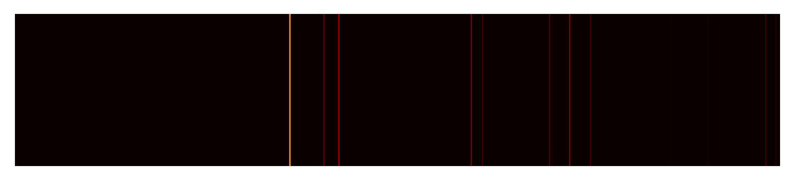

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.imshow(img)
ax.axis('off')

(-0.5, 253.5, 253.5, -0.5)

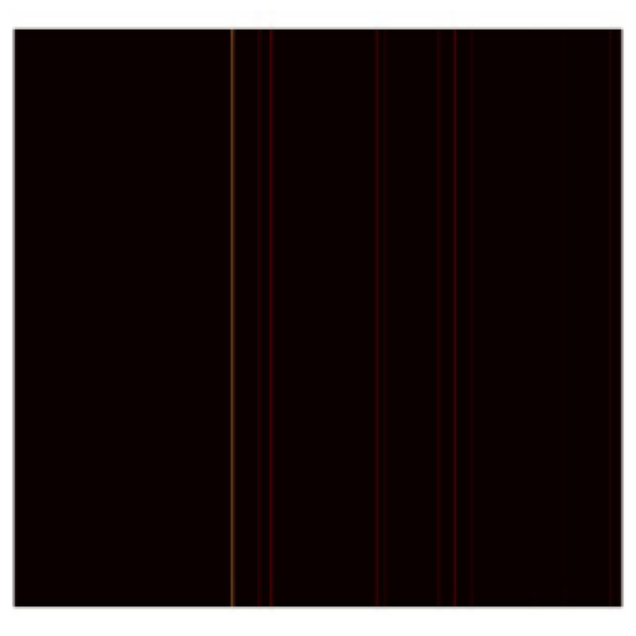

In [22]:
resized_image = transform.resize(img, (254, 254))  # Resize to 200x300 pixels

# Show original and resized images
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(resized_image)
ax.axis("off")

In [23]:
from skimage import io, img_as_ubyte

# Save the resized image
io.imsave("resized_image.jpg", img_as_ubyte(resized_image))  # Convert to uint8 before saving
